# Métodos numéricos para cálculo com polinômios

## $ \S 1 $ Introdução

Os zeros reais de polinômios com coeficientes reais podem ser calculados pelos
vários métodos estudados nos cadernos anteriores. Contudo, para determinar as
raízes complexas, é melhor utilizar um método especializado em polinômios. Aqui
apresentaremos apenas o _método de Laguerre_, que é confiável e de simples
implementação.

Antes precisaremos considerar dois algoritmos de interesse independente, um para
se avaliar de maneira eficiente um polinômio e suas derivadas, e o outro para
_deflacionar_ um polinômio uma vez determinada uma raiz $ \zeta $, ou seja, para
dividi-lo por $ (z - \zeta) $.

📝 Em todo este caderno,
$$
p\colon \mathbb C \to \mathbb C, \quad
p(z) = c_nz^n + c_{n - 1}z^{n - 1} + \cdots + c_1 z + c_0 \qquad
(c_k \in \mathbb C)
$$ 
é um polinômio com coeficientes complexos. Recorde do caderno anterior que as
derivadas de $ p $ são dadas pelas mesmas expressões que no caso de
um polinômio com coeficientes reais.


## $ \S 2 $ O método de Horner para avaliação de polinômios

### $ 2.1 $ Descrição do método de Horner

O __método de Horner__ (também conhecido como __esquema de Horner__) é um
algoritmo para avaliação de um polinômio de uma variável. Ele é baseado na
identidade:
\begin{alignat*}{9} 
&c_{0}+c_{1}z+c_{2}z^{2}+c_{3}z^{3}+\cdots +c_{n}z^{n}\\
=\ & c_{0}+z{\bigg (}c_{1}+z{\Big (}c_{2}+z{\big (}c_{3}+\cdots +z(c_{n-1}+z\,c_{n})\cdots {\big )}{\Big )}{\bigg )}.
\end{alignat*}

Mais precisamente, o algoritmo consiste dos seguintes passos:
* No $ 0 $-ésimo passo, tomamos $ y = c_n $;
* Para cada $ k = 1, \dots, n $ sucessivamente, multiplicamos o valor atual de $
  y $ por $ z $ e ao resultado somamos $ c_{n-k}\, $.
* Ao final, retornamos $ y $.

📝 Apesar de levar o nome do matemático inglês W. Horner (1786–1837), este
algoritmo já era conhecido pelo menos 500 anos antes por matemáticos persas e
chineses.

__Exemplo 1:__ Seja $ p(z) = z^2 - i z + (1 + i) $. Usando o método de Horner,
avalie $ p $ em $ z_0 = 2 - 3i $.

_Solução:_
\begin{alignat*}{9}
y &\leftarrow 1 \\
y &\leftarrow 1\,(2 - 3i) - i = 2 - 4i \\
y &\leftarrow (2 - 4i)\,(2 - 3i) + 1 + i = -7 - 13i\,.
\end{alignat*}

__Problema 1:__ Usando o método de Horner, avalie:

(a) $ p(z) = (2 - 2 i) + (1 + 5 i) z - (3 + 2 i) z^2 + z^3 $ em $ z_0 = i $.

(b) $ q(z) = z^4 - z^3 + z^2 - z + 1 $ em $ z_0 = 1 - i $.


### $ 2.2 $ Análise de desempenho do método de Horner

O método de Horner requer $ n $ operações de adição e $ n $ de
multiplicação. Em contraste, se avaliarmos o polinômio da maneira "ingênua", o
cômputo de $ c_kx^k $ utiliza $ k + 1 $ multiplicações, portanto a avaliação do
polinômio inteiro custa
$$
1 + 2 + \dots + (n + 1) = \frac{(n + 1)(n + 2)}{2} \in O(n^2)
$$
multiplicações.

Além da economia no número de passos, o número menor de multiplicações causa uma
redução substancial do acúmulo de erros de aproximação (arredondamento) na
avaliação de $ p $, por isto o método de Horner deve sempre ser preferido.

📝 Pode-se provar que, para um polinômio geral, o algoritmo de Horner é *ótimo*,
i.e., não existe um algoritmo que requeira um número menor de operações
aritméticas. Isto foi provado por A. Ostrowski em 1954 para o número de adições
e por V. Pan em 1966 para o número de multiplicações. Estes foram resultados
seminais da área de *análise de algoritmos*.


### $ 2.3 $ Implementação do método de Horner

In [26]:
def horner(coefs: list[complex], z: complex) -> complex:
    """
    Given a complex polynomial p represented by the list of its coefficients
    [c_0, c_1, ..., c_n] (where c_k is the coefficient of z^k), returns the
    value of p(z) calculated by Horner's method.
    """
    y = coefs.pop()    # Extract the last coefficient c_n from the list.
    while coefs:       # While the list of coefficients is not empty:
        y *= z
        y += coefs.pop()
    return y

📝 Observe que o esquema de Horner já tinha sido utilizado por nós (ainda que
não sob este nome) para determinar de maneira eficiente um número inteiro
$ n $ dada sua representação $ (c_n\,c_{n-1}\, \cdots c_1\,c_0)_b $ numa base
$ b $ diferente da decimal. De fato, $ n = p(b) $ para $ p $ como acima.

__Problema 2:__ Complete a implementação __recursiva__ (i.e., que chama a si
própria) do esquema de Horner esboçada abaixo:

In [17]:
def recursive_horner(coefs: list[complex], z: complex) -> complex:
    """
    Given a complex polynomial p represented by the list of its coefficients
    [c_0, c_1, ..., c_n] (where c_k is the coefficient of z^k), returns the
    value of p(z) calculated by Horner's method.
    """
    if not coefs:          # Se a lista de coeficientes é vazia, retorne ...
        return ...
    else:
        c = coefs.pop()    # Extrai o último coeficiente da lista
        y = ...            # Operação envolvendo c e recursive_horner(coefs, z).
        return y

📝 Recorde que em Python um número complexo $ a + bi $ é representado usando a
notação `a + bj`; o tipo dos números complexos é `complex`.

__Exemplo 2:__

In [2]:
from numpy import sqrt

print(1 + .23j)            # 1 + 0.23i
print(1j)                  # i
print(1 + sqrt(3) * 1j)    # 1 + √3i
print(1 + sqrt(3)j)        # Sintaxe errada!

SyntaxError: invalid syntax (1404722679.py, line 6)

__Problema 3:__ Verifique as suas respostas ao Problema 1 usando as implementações acima.

_Solução:_

## $ \S 3 $ Algoritmo de Horner para cálculo das derivadas

### $ 3.1 $ Descrição do método de Horner para o cálcula das derivadas

Uma pequena variação do algoritmo de Horner nos permite avaliar não só um
polinômio
$$
p(z) = c_{0}+c_{1}z+c_{2}z^{2}+c_{3}z^{3}+\cdots +c_{n}z^{n}
$$
num ponto dado, mas também as suas derivadas de ordens
$ 1,\,2,\, \dots $. Aqui consideraremos apenas o cálculo das duas primeiras
derivadas, já que este também será usado no método de Laguerre.

Em outra formulação, o algoritmo de Horner consiste da construção da seqüência
de polinômios
\begin{alignat*}{9}
p_0(z) &= c_n \\
p_1(z) &= c_{n - 1} + z\,p_0(z) \\
p_2(z) &= c_{n - 2} + z\,p_1(z) \\
\phantom{p_3(z)} &\ \ \vdots \\
p_k(z) &= c_{n - k} + z\,p_{k - 1}(z) \\
\phantom{p_3(z)} &\ \ \vdots \\
p(z) = p_n(z) &= c_0 + z\,p_{n - 1}(z)
\end{alignat*}
Derivando duas vezes, deduzimos as relações:
\begin{equation*}
    \begin{cases}
        p_0'(z) = 0 \\
        p_k'(z) = p_{k - 1}(z) + z\,p_{k - 1}'(z)
    \end{cases}
\qquad 
    \begin{cases}
        p_0''(z) = 0 \\
        p_k''(z) = 2p_{k - 1}'(z) + z\,p_{k - 1}''(z)
    \end{cases}
\qquad (k = 1, 2, \cdots, n)\,.
\end{equation*}
Podemos portanto aproveitar os resultados intermediários no algoritmo de Horner
de modo que também sejam calculadas os valores de $ p' $ e $ p'' $ num ponto
qualquer.

__Exemplo 3:__ Suponha que queiramos avaliar $ p $ e $ p' $ em
$ z_0 = 1 + i $, onde
$$
p(z) = 2iz^3 - 3z^2 + z + 3 + 2i\,.
$$
Seguindo o método de Horner, fazemos:
\begin{alignat*}{9}
p_0(z_0) &= 2i&&   \qquad &p_0'(z_0) &= 0&& \\
p_1(z_0) &= -3 + 2i\,(1 + i) &&= -5 + 2i
\qquad &p_1'(z_0) &= 2i + 0\,(1 + i) &&= 2i \\
p_2(z_0) &= 1 + (-5 + 2i)\,(1 + i) &&= -6 - 3i
\qquad &p_2'(z_0) &= -5 + 2i + 2i\,(1 + i) &&= -7 + 4i \\
p_3(z_0) &= (3 + 2i) -(6 + 3i)\,(1 + i) &&= -7i
\qquad &p_3'(z_0) &= -6-3i + (-7 + 4i)\,(1 + i) &&= -17 - 6i
\end{alignat*}
Portanto
$$
p(1 + i) = p_3(z_0) = -7i \qquad \text{e} \qquad p'(1 + i) = p_3'(z_0) = -17 - 6i\,.
$$

__Problema 4:__ Utilizando as contas feitas no Exemplo 3, calcule $ p''(z_0) $ usando o método de Horner.

_Solução:_

__Problema 5 (método de Horner para derivadas de ordem superior):__ Seja
$$
p(z) = c_{0}+c_{1}z+c_{2}z^{2}+c_{3}z^{3}+\cdots +c_{n}z^{n}\,.
$$

(a) Mostre que a terceira derivada $ p^{(3)} = p''' $ de $ p $ pode ser
calculada de maneira seqüencial através das relações:
$$
p_0^{(3)}(z) = 0, \quad p_k^{(3)}(z) = 3p_{k - 1}''(z) + z\,p_{k - 1}^{(3)}(z) \qquad (k = 1, 2, \dots, n)
$$
de modo que $ p^{(3)}(z) = p_n^{(3)}(z)\, $. _Dica:_ Derive os polinômios
$ p_k'' $ utilizados no cálculo da segunda derivada de $ p $.

(b) Generalizando, mostre que a $ r $-ésima derivada $ p^{(r)}(z) $ é dada
por $ p_n^{(r)}(z) $ onde:
$$
p_0^{(r)}(z) = 0, \quad p_k^{(r)}(z) =
rp_{k - 1}^{(r-1)}(z) + z\,p_{k - 1}^{(r)}(z) \qquad (k = 1, 2, \dots, n)\,.
$$

### $ 3.2 $ Implementação do método de Horner para cálcula de um polinômio e de suas derivadas

In [25]:
def horner_deriv(coefs: list[complex], z: complex
                 ) -> tuple[complex, complex, complex]:
    """
    Given a polynomial p represented by the list of its coefficients
    [c_0, c_1, ..., c_n] (where c_k is the coefficient of z^k) and a number z,
    evaluates the polynomial, its first derivative, and its second derivative
    at the point z and returns the corresponding values (y, dy, ddy).
    """
    n = len(coefs) - 1
    y = coefs.pop()     # Initial value for the polynomial.
    dy = 0.0 + 0.0j     # Initial value for the first derivative.
    ddy = 0.0 + 0.0j    # Initial value for the second derivative.

    # Iterate through the coefficients, updating the polynomial and its
    # derivatives at each step:
    for k in range(1, n + 1):
        ddy = ddy * z + 2.0 * dy
        dy = dy * z + y
        y = y * z + coefs.pop()

    return y, dy, ddy

## $ \S 4 $ Deflação de polinômios

### $ 4.1 $ Descrição do método de deflação polinomial

Suponha que $ r $ seja um zero de um polinômio
\begin{equation*}\label{E:1}
p(z) = c_{0}+c_{1}z+c_{2}z^{2}+c_{3}z^{3}+\cdots +c_{n}z^{n}\,. \tag{1}
\end{equation*}
de grau $ n $. Então, como visto no caderno anterior, podemos fatorar $ p $ como
\begin{equation*}\label{E:2}
p(z) = (z - r)\,q(z) \tag{2}
\end{equation*}
onde $ q $ tem grau $ n - 1 $.  Para encontrar $ q(z) $, basta dividir $ p(z) $
por $ (z - r) $. Entretanto, pela forma especial do divisor, há um método muito
mais eficiente, conhecido neste contexto por __deflação__.  Observe que os zeros
restantes de $ p $ devem ser zeros de $ q $.  Portanto a deflação reduz o grau
do polinômio a cada raiz encontrada, facilitando a busca pelas outras raízes.
Além disto, a deflação elimina a chance de calcularmos a mesma raiz mais de uma
vez. 

Seja
\begin{equation*}\label{E:3}
q(z) = b_0 + b_1z + b_2z^2 + \cdots + b_{n-1}z^{n-1}\,. \tag{3}
\end{equation*}
Substituindo \eqref{E:1} e \eqref{E:3} em \eqref{E:2}, deduzimos que
$$
c_0 + c_1z + c_2z^2 + \cdots + c_{n-1}z^{n-1} + c_nz^n =
(z - r)(b_0 + b_1z + \cdots + b_{n - 2}z^{n - 2} + b_{n-1}z^{n-1})
$$
Igualando os coeficientes de potências iguais de $ z $, obtemos sucessivamente:
$$
b_{n-1} = c_n\,, \quad b_{n - 2} = c_{n - 1} + rb_{n - 1}\,, \quad \cdots
\quad b_k = c_{k + 1} + rb_{k + 1}\,,\quad \cdots \quad b_0 = c_1 + rb_1\,.
$$


__Problema 6:__ Em cada item abaixo, são dados um polinômio $ p $ e uma 
de suas raízes $ r $. Aplique o algoritmo de deflação a ele para encontrar
o quociente de $ p $ por $ (z - r) $.

(a) $ p(z) = z^4 - z^3 - 5 z^2 - z - 6 $ e $ r = -2 $.

(b) $ p(z) = 3z^3 - 19z^2 + 45z - 13 $ e $ r = 3 - 2i $.

(c) $ p(z) = z^4 - 5 z^3 + 10 z^2 - 10 z + 4 $ e $ r = -1 + i $.

_Solução:_


### $ 4.2 $ Implementação da deflação polinomial

In [ ]:
def deflation(coefs: list[complex], r: complex) -> list[complex]:
    """
    Deflates a polynomial p represented by its list of coefficients `coefs`
    (from lowest to highest degree) by dividing it by a linear factor (z - r),
    where r is a complex root of the polynomial. Returns a list of complex
    numbers, representing the coefficients of the deflated polynomial.
    """
    n = len(coefs) - 1           # n = degree of p.
    new_coefs = [0] * n          # Initialize the list of new coefficients.
    new_coefs[n - 1] = coefs[n]  # Set the first new coefficient.
    
    # Perform the deflation algorithm:
    for k in range(n - 1, 0, -1):
        new_coefs[k - 1] = coefs[k] + r * new_coefs[k]
    return new_coefs

__Problema 7:__ Usando a implementação acima, deflacione os polinômios
seguintes a um polinômio de grau $ 3 $ dada a raiz $ r $ indicada:

(a) $ p(z) = z^5 + 10 z^4 + 19 z^3 - 24 z^2 - 82 z - 84 $ e $ r = 1 + i $.

(b) $ p(z) = z^5 - 30z^4 + 361z^3 - 2178z^2 + 6588z - 7992 $ e $ r = -6 - i $.

_Dica:_ Como estes polinômios têm coeficientes reais, as suas raízes complexas
vêm em pares conjugados. Deflacione $ p $ duas vezes.

_Solução:_

## $ \S 5 $ Método de Laguerre

📝 Recorde do caderno anterior que se $ p(z) $ é um polinômio com coeficientes
_reais_, então suas raízes não-reais vêm em pares conjugados. Portanto ao
encontrar uma delas automaticamente deduzimos mais outra.

## $ \S 6 $ Exponenciação eficiente

In [3]:
def power(b: float, n: int) -> float:
    """ Recursively calculates the value of b raised
        to the n-th power (n is an integer).
    """
    if n < 0:
        return 1 / power(b, -n)
    elif n == 0:
        return 1
    else:
        if n % 2 == 0:
            return power(b, n // 2)**2
        else:
            return b * power(b, n - 1)

In [11]:
def plot_function(f, a, b):
    """
    Plots the graph of a single-variable function f in the interval
    [a, b] (or [b, a], if b < a), using Matplotlib.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    xs = np.linspace(a, b, num=401)
    ys = f(xs)
    plt.plot(xs, ys, '-', label="$ y = f(x) $")
    plt.grid(True)
    plt.xlabel('$ x $')
    plt.ylabel('$ y $')
    plt.legend()
    plt.show()
    return None


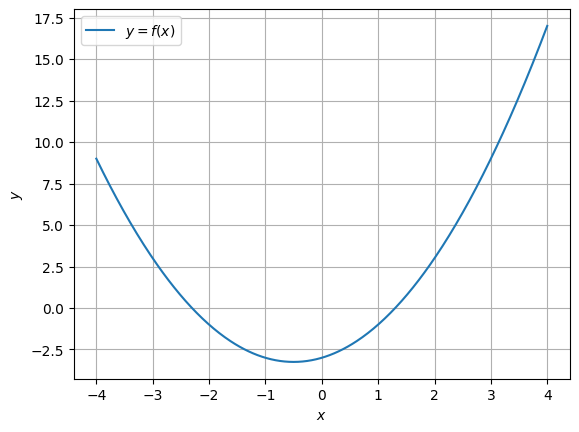

In [14]:
xs = [-1, 0, 1]
ys = [1, 0, 1]
p = lambda x: x**2 + x - 3
p(2)
a = 4
b = -4
plot_function(p, b, a)